In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [4]:
!pip3 install mlxtend

     ---------------------------------------- 1.3/1.3 MB 2.0 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [7]:
data = pd.read_csv('Social_Network_Ads.csv')

In [8]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [9]:
X = data[['Age','EstimatedSalary']].values
y = data['Purchased'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting K-NN to the Training set**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9083333333333333

**Predicting the Test set results**

In [14]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , 
      " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10, scoring = "roc_auc"))) 

C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K value  :  1  train score :  0.9928571428571429  cv score :  0.8441176470588235
K value  :  2  train score :  0.9214285714285714  cv score :  0.9211229946524064
K value  :  3  train score :  0.9285714285714286  cv score :  0.926470588235294
K value  :  4  train score :  0.9214285714285714  cv score :  0.9331550802139036
K value  :  5  train score :  0.9214285714285714  cv score :  0.932620320855615
K value  :  6  train score :  0.9142857142857143  cv score :  0.9318181818181819
K value  :  7  train score :  0.9107142857142857  cv score :  0.9371657754010695
K value  :  8  train score :  0.9142857142857143  cv score :  0.941711229946524
K value  :  9  train score :  0.9178571428571428  cv score :  0.945187165775401
K value  :  10  train score :  0.9107142857142857  cv score :  0.9478609625668449
K value  :  20  train score :  0.9107142857142857  cv score :  0.9494652406417112
K value  :  50  train score :  0.9107142857142857  cv score :  0.9545454545454547


C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

**Making the Confusion Matrix**

In [20]:
from sklearn.model_selection import cross_val_score
data = pd.read_csv('Social_Network_Ads.csv')
x = data[['Age','EstimatedSalary']].values
y = data['Purchased'].astype(int).values
for k in [1,2,3,4,5,6,7,8,9,10,20,40,80]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x,y)
    print("K value : ", k, " train score : ", clf.score(x,y) , 
          " test score : ", cross_val_score(clf,x,y,cv = 10, scoring = 'f1_macro').mean())

C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K value :  1  train score :  0.995  test score :  0.7833876398548056
K value :  2  train score :  0.9  test score :  0.7424965784511247
K value :  3  train score :  0.8975  test score :  0.7620431242108454
K value :  4  train score :  0.8625  test score :  0.7405255605586367
K value :  5  train score :  0.8725  test score :  0.7535749423940757
K value :  6  train score :  0.8625  test score :  0.7247884198811881


C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K value :  7  train score :  0.87  test score :  0.7583049742488154
K value :  8  train score :  0.8475  test score :  0.7353496750874574
K value :  9  train score :  0.8725  test score :  0.7455892570118295
K value :  10  train score :  0.8475  test score :  0.6953339481559533
K value :  20  train score :  0.8175  test score :  0.7071845582283445
K value :  40  train score :  0.8025  test score :  0.7085351543857901
K value :  80  train score :  0.7725  test score :  0.6878586254564227


C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [21]:
for k in [1,2,3,4,5,6,7,8,9,10,20,40,80]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x,y)
    print("K value : ", k, " train score : ", clf.score(x,y) ,
        " test score : ", cross_val_score(clf,x,y,cv = 10, scoring = 'accuracy').mean())

C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K value :  1  train score :  0.995  test score :  0.8025
K value :  2  train score :  0.9  test score :  0.79
K value :  3  train score :  0.8975  test score :  0.79
K value :  4  train score :  0.8625  test score :  0.7925
K value :  5  train score :  0.8725  test score :  0.7849999999999999
K value :  6  train score :  0.8625  test score :  0.7825
K value :  7  train score :  0.87  test score :  0.7949999999999999


C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K value :  8  train score :  0.8475  test score :  0.79
K value :  9  train score :  0.8725  test score :  0.7875
K value :  10  train score :  0.8475  test score :  0.76
K value :  20  train score :  0.8175  test score :  0.7725
K value :  40  train score :  0.8025  test score :  0.7775000000000001
K value :  80  train score :  0.7725  test score :  0.7675000000000001


C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Snega\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [28]:
def logistic(data, k = 0):
    x = data[['Age','EstimatedSalary']].values
    y = data['Purchased'].astype(int).values
    clf = LogisticRegression()
    clf.fit(x, y)
    print(clf.score(x,y))
    print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
    print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.title('Losgistic Regression decision boundary')
    plt.show()

0.6425
Train Accuracy :  0.6425
Val Accuracy :  0.675


C:\Users\Snega\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


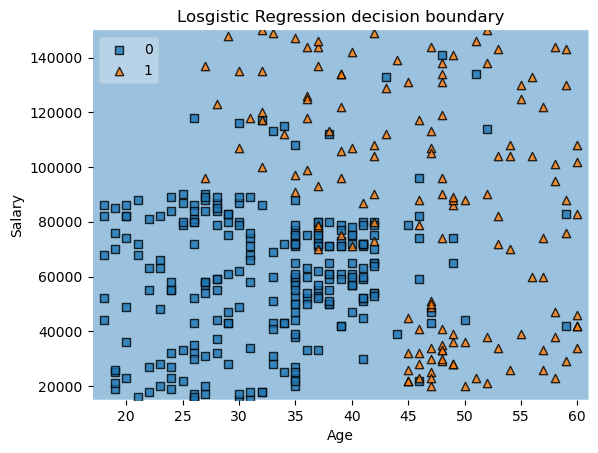

In [32]:
logistic(data,4)